In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import matplotlib.cm as cm
import pickle
import gensim

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from wordcloud import WordCloud
from collections import Counter
from nltk.cluster import KMeansClusterer
from gensim.models import Word2Vec
from nltk.cluster.util import cosine_distance
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.random.seed(20220421)

In [31]:
documentos = pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios_stemm_final.pkl','rb'))

In [59]:
#lista de listas
texto = [element.split() for element in documentos]

In [5]:
model = Word2Vec(sentences=texto, size=100, window=10, min_count=1, workers=4)

In [6]:
model.save("word2vec_informes_presidenciales_final.model")

In [3]:
#carga de modelo
model = gensim.models.Word2Vec.load("word2vec_informes_presidenciales_final.model")

In [4]:
X_keys = list(model.wv.vocab.keys())

In [5]:
X = model[model.wv.vocab]

<ipython-input-5-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [6]:
type(X)

numpy.ndarray

In [7]:
len(X)

14992

### Kmeans

In [11]:
kmeans_results = []

grupos = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

for element in grupos:
    kmeans = KMeans(n_clusters=element, max_iter=100)
    kmeans_results.append(kmeans.fit(X))
    

In [12]:
pickle.dump(kmeans_results,open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\kmeans_word2vec_informes_final.pkl','wb'))

In [8]:
#carga modelo kmeans
grupos = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
kmeans_results=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\kmeans_word2vec_informes_final.pkl','rb'))

In [9]:
sses = [element.inertia_ for element in kmeans_results]

sse = pd.DataFrame({'grupos': grupos, 
                  'sse': sses})

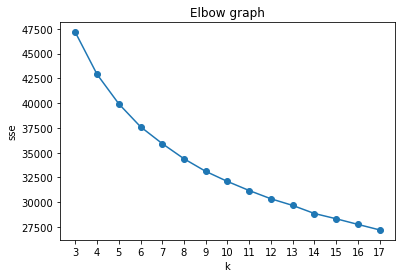

In [10]:
plt.clf()
plt.plot(sse.grupos, sse.sse)
plt.scatter(sse.grupos, sse.sse)
plt.xticks(grupos)
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow graph")
plt.show()

## Silhouette

In [15]:
scaler = MinMaxScaler()

In [16]:
X_scaled = scaler.fit_transform(X)

In [17]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [18]:
range_n_clusters = k

For n_clusters = 3 The average silhouette_score is : 0.6990333


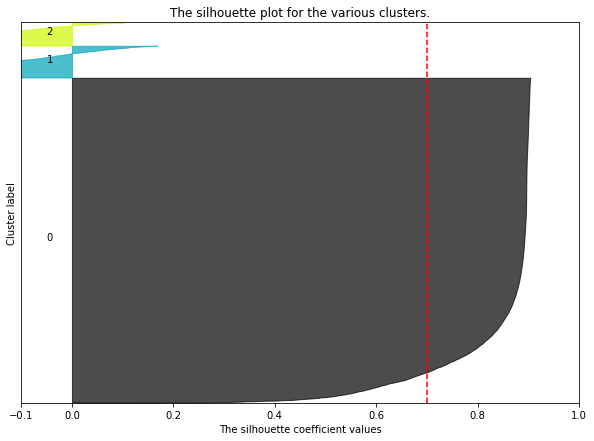

For n_clusters = 4 The average silhouette_score is : 0.70570934


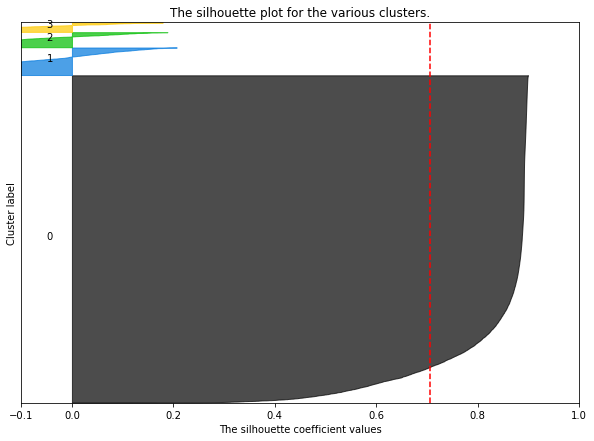

For n_clusters = 5 The average silhouette_score is : 0.59677595


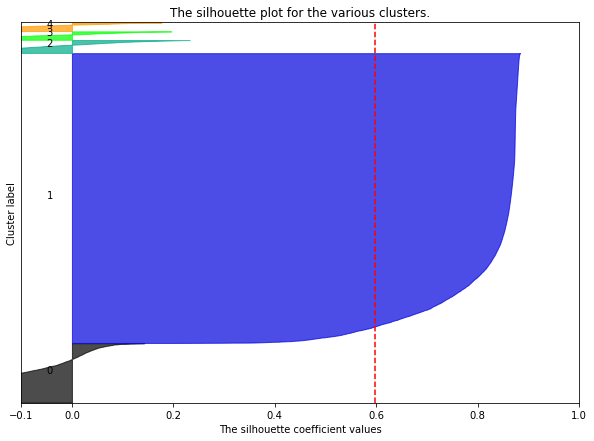

For n_clusters = 6 The average silhouette_score is : 0.58949757


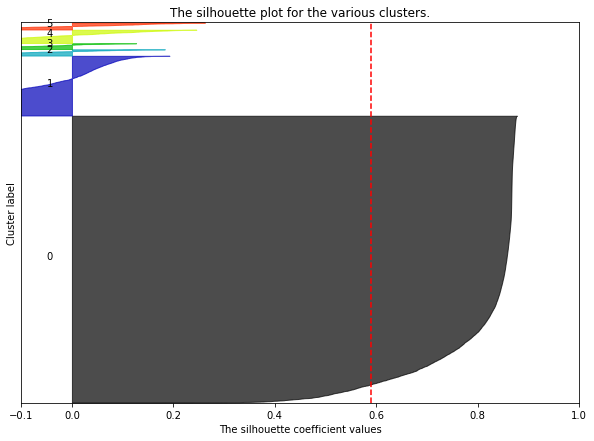

For n_clusters = 7 The average silhouette_score is : 0.58659893


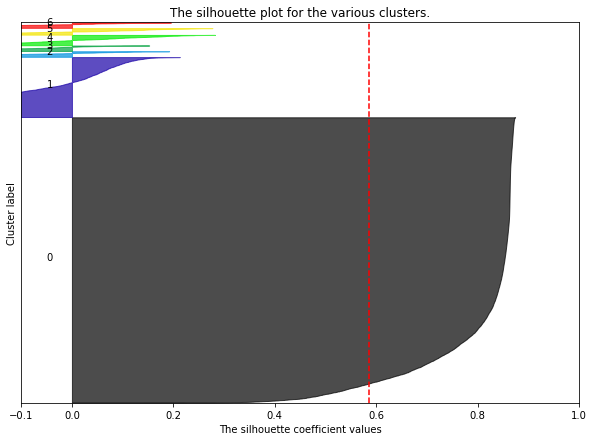

For n_clusters = 8 The average silhouette_score is : 0.5893791


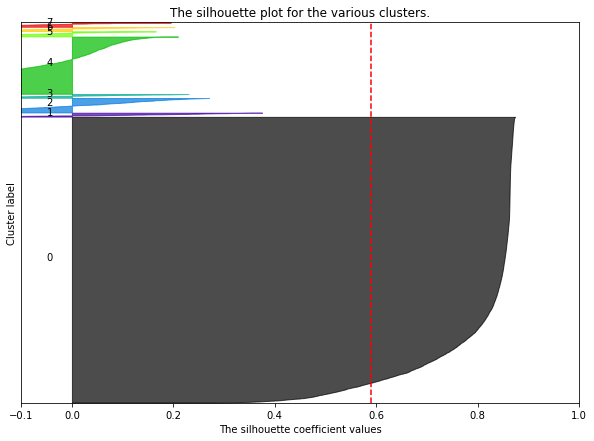

For n_clusters = 9 The average silhouette_score is : 0.6208047


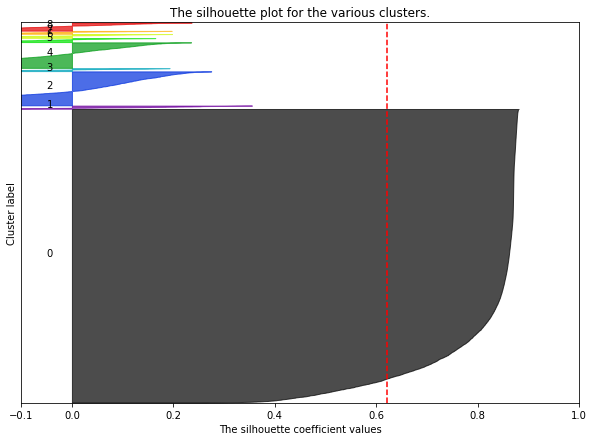

For n_clusters = 10 The average silhouette_score is : 0.60846883


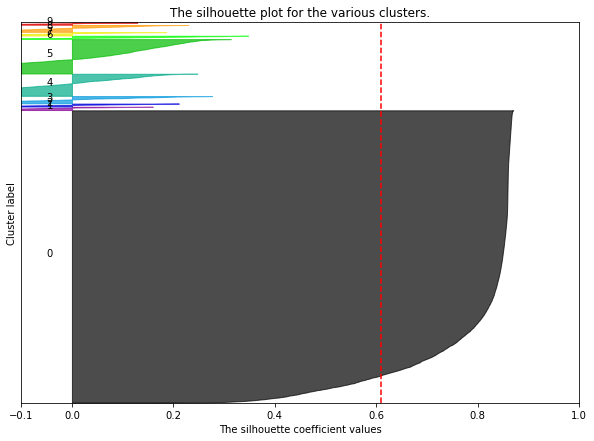

For n_clusters = 11 The average silhouette_score is : 0.5384533


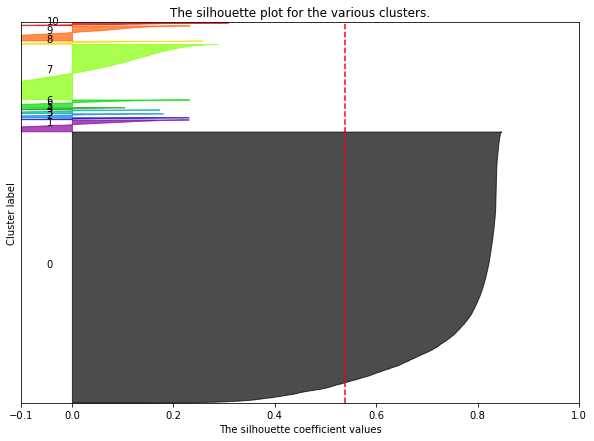

For n_clusters = 12 The average silhouette_score is : 0.522202


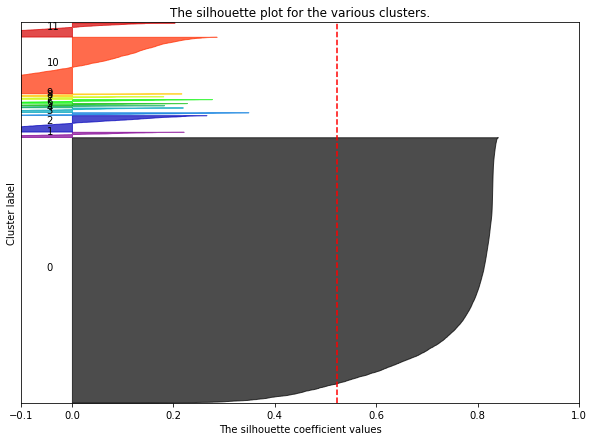

For n_clusters = 13 The average silhouette_score is : 0.51690197


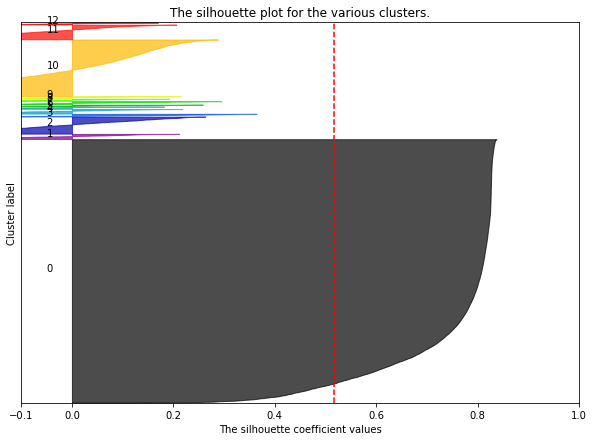

For n_clusters = 14 The average silhouette_score is : 0.5372064


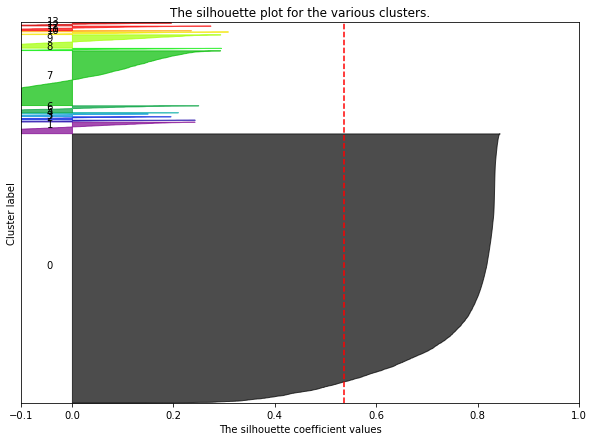

For n_clusters = 15 The average silhouette_score is : 0.52336097


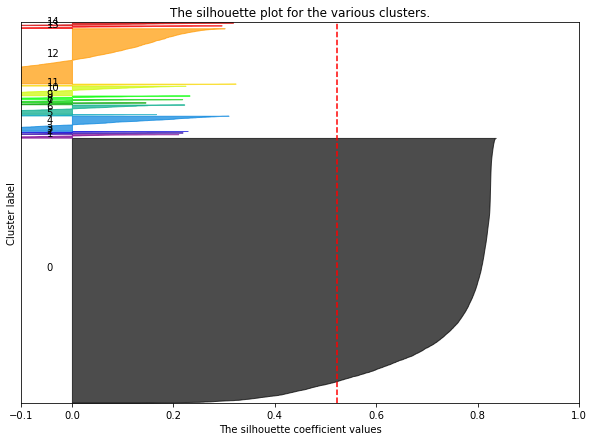

For n_clusters = 16 The average silhouette_score is : 0.51552755


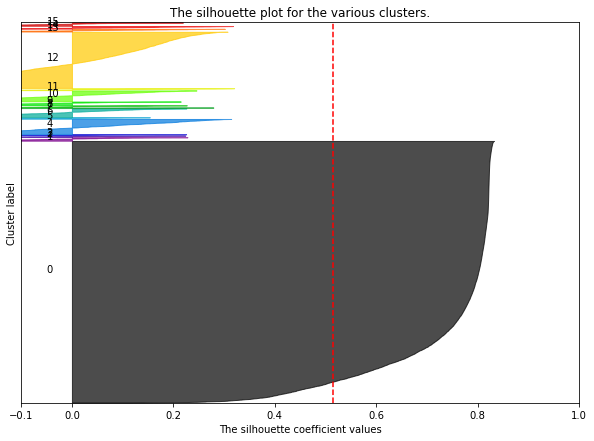

For n_clusters = 17 The average silhouette_score is : 0.5134586


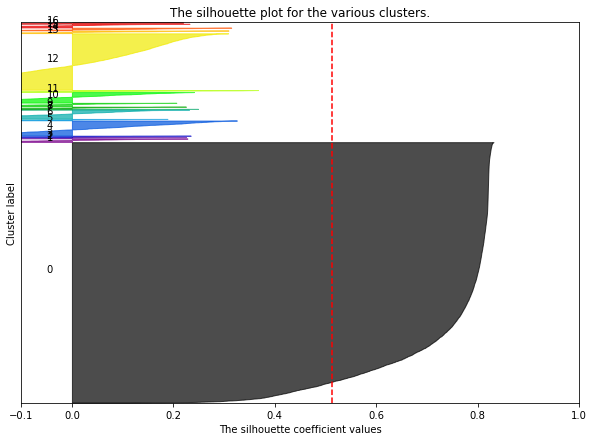

In [19]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)



    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()


In [24]:
n_grupos = 4

In [25]:
kmeans_word2vec = kmeans_results[grupos.index(n_grupos)]

In [26]:
len(kmeans_word2vec.labels_)

14992

In [27]:
labels = pd.DataFrame({'vocabulary': X_keys, 'grupo': kmeans_word2vec.labels_})

In [28]:
labels

,vocabulary,grupo
0,inform,1
1,gobiern,1
2,president,1
3,manuel,1
4,avil,0
...,...,...
14987,ciceron,0
14988,salvacion,0
14989,ras,0
14990,lograri,0


In [29]:
labels.groupby(['grupo'], as_index=False).count()

,grupo,vocabulary
0,0,12918
1,1,1104
2,2,593
3,3,377


In [32]:
grupo=[]

porcentajes = []

for i in range(len(documentos)):

    df_aux=pd.DataFrame({'palabras_doc':documentos[i].split()})

    intersect = labels.merge(df_aux,how='inner',left_on='vocabulary',right_on='palabras_doc')

    intersect_unq = intersect.drop_duplicates()

    num_grupo = intersect_unq.groupby(['grupo'],as_index=False).count().sort_values(by='vocabulary',ascending=False).iat[0,0]
    
    porcentajes.append(intersect_unq.groupby(['grupo'],as_index=False).count().sort_values(by='vocabulary',ascending=False))
    
    grupo.append(num_grupo)

In [33]:
for i in range(len(porcentajes)):
    porcentajes[i].drop(['vocabulary'],inplace=True,axis=1)

In [34]:
for i in range(len(porcentajes)):
    porcentajes[i]['porcentaje']=(porcentajes[i]['palabras_doc']/porcentajes[i]['palabras_doc'].sum())*100

## Distribución porcentual de los grupos por documento

In [35]:
for i in range(len(porcentajes)):
    print(porcentajes[i])

   grupo  palabras_doc  porcentaje
0      0          2015   54.006969
1      1           929   24.899491
2      2           472   12.650764
3      3           315    8.442777
   grupo  palabras_doc  porcentaje
0      0          2116   54.451879
1      1           922   23.726197
2      2           524   13.484303
3      3           324    8.337622
   grupo  palabras_doc  porcentaje
0      0          1692   50.222618
1      1           882   26.179875
2      2           493   14.633422
3      3           302    8.964084
   grupo  palabras_doc  porcentaje
0      0          1316   45.192308
1      1           847   29.086538
2      2           454   15.590659
3      3           295   10.130495
   grupo  palabras_doc  porcentaje
0      0          1468   47.600519
1      1           848   27.496757
2      2           477   15.466926
3      3           291    9.435798
   grupo  palabras_doc  porcentaje
0      0          1529   48.447402
1      1           819   25.950570
2      2           5

In [40]:
df = pd.DataFrame({'documentos':documentos,'grupo':grupo, 'year':range(1941,2022)})
df

,documentos,grupo,year
0,inform gobiern president manuel avil camach se...,0,1941
1,inform gobiern president manuel avil camach se...,0,1942
2,inform gobiern president manuel avil camach se...,0,1943
3,inform gobiern president manuel avil camach se...,0,1944
4,inform gobiern president manuel avil camach se...,0,1945
...,...,...,...
76,president republ epn fech publicacion septiemb...,1,2017
77,president republ epn fech publicacion septiemb...,1,2018
78,president republ septiembr president andres ma...,0,2019
79,president republ fech publicacion septiembr ca...,1,2020


In [36]:
from itertools import repeat

In [37]:
auxiliar=['avila camacho','aleman valdes','ruiz cortines','lopez mateos','diaz ordaz','echeverria alvarez','lopez portillo'
          ,'de la madrid','salinas de gortari','zedillo ponce de leon','fox quesada','calderon hinojosa', 'pena nieto']

In [38]:
presidentes=[]

for i in range(len(auxiliar)):
    presidentes.extend(repeat(auxiliar[i],6))

presidentes.extend(repeat('lopez obrador',3))

In [41]:
df['presidentes']=presidentes

In [42]:
df[df.grupo==0]

,documentos,grupo,year,presidentes
0,inform gobiern president manuel avil camach se...,0,1941,avila camacho
1,inform gobiern president manuel avil camach se...,0,1942,avila camacho
2,inform gobiern president manuel avil camach se...,0,1943,avila camacho
3,inform gobiern president manuel avil camach se...,0,1944,avila camacho
4,inform gobiern president manuel avil camach se...,0,1945,avila camacho
5,inform gobiern president manuel avil camach se...,0,1946,avila camacho
6,inform gobiern president miguel alem vald sept...,0,1947,aleman valdes
7,inform gobiern president miguel alem vald sept...,0,1948,aleman valdes
8,inform gobiern president miguel alem vald sept...,0,1949,aleman valdes
9,inform gobiern president miguel alem vald sept...,0,1950,aleman valdes


In [43]:
df[df.grupo==1]

,documentos,grupo,year,presidentes
48,inform gobiern carl salin gortari president un...,1,1989,salinas de gortari
54,inform gobiern ernest zedill ponc leon preside...,1,1995,zedillo ponce de leon
55,inform gobiern ernest zedill ponc leon preside...,1,1996,zedillo ponce de leon
56,inform gobiern ernest zedill ponc leon preside...,1,1997,zedillo ponce de leon
57,inform gobiern ernest zedill ponc leon preside...,1,1998,zedillo ponce de leon
58,inform gobiern ernest zedill ponc leon preside...,1,1999,zedillo ponce de leon
59,inform gobiern ernest zedill ponc leon preside...,1,2000,zedillo ponce de leon
60,inform gobiern vicent fox ques president unid ...,1,2001,fox quesada
61,inform gobiern vicent fox ques president unid ...,1,2002,fox quesada
62,inform gobiern vicent fox ques president unid ...,1,2003,fox quesada


In [56]:
df[df.grupo==0].shape

(56, 4)

In [57]:
df[df.grupo==1].shape

(25, 4)

## Word Cloud

In [57]:
def generate_wordcloud(grupo, df, column):
    """Generates a wordcloud from a particular column"""
    df_grupo = df[df.grupo == grupo]
    wc_i = wc.generate(' '.join(df_grupo[column]))
    wc.to_file("wc_kmeans_word2vec_informes_" + str(grupo) + ".png")
    plt.clf()
    plt.figure()
    plt.imshow(wc_i, interpolation="bilinear")
    plt.axis("off")
    plt.title("grupo " + str(grupo))
    plt.show()

In [27]:
wc = WordCloud(background_color="white")

In [ ]:
for element in range(n_grupos):
    generate_wordcloud(element, df, "documentos")

### Similitud

In [4]:
model.wv.most_similar(positive=['mil'])

[('cerc', 0.9154264330863953),
 ('doscient', 0.8968509435653687),
 ('trescient', 0.885358989238739),
 ('millon', 0.8846065402030945),
 ('quinient', 0.8776534795761108),
 ('siet', 0.8761072754859924),
 ('setent', 0.8735916018486023),
 ('cincuent', 0.8719741106033325),
 ('cuatrocient', 0.8717805743217468),
 ('iso', 0.8692958354949951)]

In [10]:
model.wv.most_similar(negative=['mil'])

[('peraz', 0.7168739438056946),
 ('prop', 0.6936547756195068),
 ('intelect', 0.693008542060852),
 ('revocacion', 0.689853847026825),
 ('ezln', 0.6772722601890564),
 ('imbat', 0.6732572913169861),
 ('hipertrofi', 0.6708871126174927),
 ('─vecin', 0.6692243814468384),
 ('repens', 0.6685795783996582),
 ('suci', 0.6681538820266724)]

In [7]:
model.wv.most_similar(positive=['millon'])

[('mil', 0.8846065402030945),
 ('billon', 0.8662456274032593),
 ('total', 0.8331478834152222),
 ('cantid', 0.8127560019493103),
 ('alrededor', 0.8005625009536743),
 ('cerc', 0.7950438261032104),
 ('iso', 0.7940889596939087),
 ('sum', 0.7902439832687378),
 ('centav', 0.7854057550430298),
 ('aproxim', 0.7808676958084106)]

In [6]:
model.wv.most_similar(positive=['pes'])

[('asciend', 0.8278835415840149),
 ('sarmient', 0.8225775361061096),
 ('dolar', 0.793218731880188),
 ('mont', 0.7911495566368103),
 ('sum', 0.7679964303970337),
 ('cantid', 0.762488842010498),
 ('total', 0.7541239261627197),
 ('─contribuyent', 0.7326170206069946),
 ('ascendi', 0.7283768653869629),
 ('$', 0.7201627492904663)]

In [16]:
model.wv.most_similar(negative=['pes'])

[('postrevolucionari', 0.6420199871063232),
 ('imbat', 0.6360298991203308),
 ('intelect', 0.6296541690826416),
 ('faltist', 0.5868837833404541),
 ('urgiend', 0.5815317034721375),
 ('llovi', 0.5748372077941895),
 ('xenofob', 0.5746398568153381),
 ('fotogrametri', 0.5705206394195557),
 ('113', 0.5651634931564331),
 ('cabrit', 0.5646997690200806)]

In [7]:
model.wv.most_similar(positive=['nacional'])

[('cre', 0.8394904136657715),
 ('tecnic', 0.8291983604431152),
 ('cientif', 0.8240506052970886),
 ('cienci', 0.8139936923980713),
 ('investigacion', 0.8050880432128906),
 ('tecnolog', 0.8021472096443176),
 ('promocion', 0.781057596206665),
 ('creacion', 0.7617267370223999),
 ('sam', 0.7588016986846924),
 ('elabor', 0.7577723860740662)]

In [9]:
model.wv.most_similar(positive=['nacion'])

[('iber', 0.879665732383728),
 ('amist', 0.8790583610534668),
 ('cordial', 0.8776421546936035),
 ('continent', 0.864896297454834),
 ('diplomaci', 0.8633477687835693),
 ('presenci', 0.8620861172676086),
 ('soberan', 0.8617345094680786),
 ('reafirm', 0.8576985597610474),
 ('connatural', 0.8539696931838989),
 ('dignidad', 0.8492320775985718)]

In [4]:
model.wv.most_similar(negative=['nacion'])

[('86', 0.8136770725250244),
 ('chatarr', 0.7832367420196533),
 ('159', 0.7354849576950073),
 ('escrituracion', 0.7240346670150757),
 ('planch', 0.7164565324783325),
 ('aproximacion', 0.7090760469436646),
 ('macay', 0.7049604654312134),
 ('reforma─', 0.702018141746521),
 ('subscripcion', 0.7004872560501099),
 ('apoltron', 0.6766364574432373)]

In [11]:
model.wv.most_similar(positive=['crimen'])

[('ataqu', 0.9750535488128662),
 ('arbitraried', 0.9731688499450684),
 ('inclin', 0.9726744890213013),
 ('culpabl', 0.9723291397094727),
 ('culp', 0.9713692665100098),
 ('totalitari', 0.9702656269073486),
 ('festej', 0.9695291519165039),
 ('egoist', 0.96717369556427),
 ('monopoliz', 0.9668881893157959),
 ('aventurer', 0.9665882587432861)]

In [5]:
model.wv.most_similar(negative=['crimen'])

[('matanuc', 0.8686202764511108),
 ('micropol', 0.7704031467437744),
 ('inco', 0.7679519653320312),
 ('mostreador', 0.7579342722892761),
 ('plieg', 0.7538670301437378),
 ('138', 0.7197327613830566),
 ('reexpid', 0.7151608467102051),
 ('signatur', 0.6949456930160522),
 ('bipartit', 0.6908503770828247),
 ('generari', 0.6772554516792297)]

In [13]:
model.wv.most_similar(positive=['ley'])

[('modif', 0.8901817202568054),
 ('disposicion', 0.8716453909873962),
 ('proced', 0.863929271697998),
 ('constitucional', 0.854995846748352),
 ('legal', 0.8493335247039795),
 ('reglament', 0.8481308221817017),
 ('expidi', 0.8474472761154175),
 ('legislacion', 0.8377800583839417),
 ('concrecion', 0.8281334638595581),
 ('inconstitucional', 0.8275601863861084)]

In [6]:
model.wv.most_similar(negative=['ley'])

[('llenari', 0.6116538047790527),
 ('anticontaminacion', 0.6093885898590088),
 ('resignari', 0.6058220863342285),
 ('anticoncept', 0.5983229279518127),
 ('limitrof', 0.5819531083106995),
 ('caminer', 0.5646910667419434),
 ('160', 0.5486205220222473),
 ('maciz', 0.5428079962730408),
 ('esboz', 0.542628288269043),
 ('ascenderi', 0.5391818284988403)]

In [3]:
model.wv.most_similar(positive=['logr'])

[('avanc', 0.9008666276931763),
 ('sosten', 0.8885331749916077),
 ('ello', 0.8790872097015381),
 ('crecimient', 0.8762853145599365),
 ('demand', 0.8693438172340393),
 ('aceler', 0.863937497138977),
 ('condicion', 0.8590179681777954),
 ('ritm', 0.855695366859436),
 ('mitig', 0.845747709274292),
 ('demograf', 0.8447569012641907)]

In [13]:
model.wv.most_similar(positive=['priv'])

[('financi', 0.9171253442764282),
 ('sector', 0.9000463485717773),
 ('inversion', 0.8886577486991882),
 ('canaliz', 0.8636671304702759),
 ('paraestatal', 0.8529919981956482),
 ('usam', 0.848080575466156),
 ('select', 0.8399721384048462),
 ('empres', 0.8387206792831421),
 ('ahorr', 0.8350263833999634),
 ('presupuestal', 0.8340822458267212)]

In [53]:
model.wv.most_similar(negative=['logr'])

[('actas', 0.7590552568435669),
 ('ixta', 0.7463423609733582),
 ('condenatori', 0.7444207668304443),
 ('maleabl', 0.7360814809799194),
 ('absolutori', 0.721080482006073),
 ('chichihualc', 0.7193661332130432),
 ('western', 0.7134127020835876),
 ('vinci', 0.6972951889038086),
 ('onda', 0.692548394203186),
 ('azuet', 0.6883196830749512)]

In [54]:
model.wv.most_similar(positive=['inversion'])

[('priv', 0.888657808303833),
 ('sector', 0.8521933555603027),
 ('financi', 0.8364307880401611),
 ('canaliz', 0.8235384225845337),
 ('recurrir', 0.8098433017730713),
 ('compagin', 0.8046518564224243),
 ('ahorr', 0.8010748624801636),
 ('gast', 0.7957975268363953),
 ('finanz', 0.7952392101287842),
 ('reactivacion', 0.7880791425704956)]

In [55]:
model.wv.most_similar(negative=['inversion'])

[('pleyad', 0.7471349835395813),
 ('invalidacion', 0.7459021806716919),
 ('xenofob', 0.7093149423599243),
 ('maritain', 0.7055664658546448),
 ('imbat', 0.6958006620407104),
 ('angari', 0.6917921304702759),
 ('urgiend', 0.6911214590072632),
 ('ariet', 0.6765820980072021),
 ('amoral', 0.6653101444244385),
 ('madrug', 0.6645790338516235)]

In [15]:
model.wv.most_similar(positive=['economi'])

[('acentu', 0.9491741061210632),
 ('dinam', 0.9249216318130493),
 ('factor', 0.9231579303741455),
 ('intern', 0.9217981100082397),
 ('desequilibri', 0.9173903465270996),
 ('competit', 0.9108299016952515),
 ('variabil', 0.9058116674423218),
 ('expansion', 0.8995029330253601),
 ('crecient', 0.8920819163322449),
 ('infortun', 0.8875081539154053)]

In [15]:
model.wv.most_similar(positive=['desequilibri'])

[('acentu', 0.9726681709289551),
 ('amortigu', 0.969029426574707),
 ('atenu', 0.964793860912323),
 ('sobresalt', 0.9641008377075195),
 ('inflacionari', 0.9631110429763794),
 ('establ', 0.9605364799499512),
 ('evolucion', 0.9582750201225281),
 ('desciend', 0.9576109647750854),
 ('presion', 0.9551222324371338),
 ('sever', 0.9536289572715759)]

In [16]:
model.wv.most_similar(negative=['economi'])

[('condenatori', 0.8440757393836975),
 ('madrigal', 0.8154957294464111),
 ('aprehension', 0.7907187342643738),
 ('absolutori', 0.7817573547363281),
 ('leprocomi', 0.7693994641304016),
 ('azuet', 0.7594785690307617),
 ('ixta', 0.7552474737167358),
 ('peritaj', 0.7399251461029053),
 ('tnt', 0.7336846590042114),
 ('chichihualc', 0.7302974462509155)]

In [59]:
model.wv.most_similar(positive=['administracion'])

[('presupuest', 0.8267244696617126),
 ('cambiar', 0.7435764074325562),
 ('presupuestal', 0.7226982712745667),
 ('beneficent', 0.697358250617981),
 ('ejercici', 0.6872164607048035),
 ('egres', 0.6867663264274597),
 ('correspondient', 0.6866349577903748),
 ('federacion', 0.6852350234985352),
 ('abarqu', 0.6824145913124084),
 ('yosocut', 0.6777659058570862)]

In [61]:
model.wv.most_similar(positive=['desarroll'])

[('impuls', 0.9249594807624817),
 ('orient', 0.8606806993484497),
 ('estrategi', 0.8513771295547485),
 ('activ', 0.837112545967102),
 ('integracion', 0.8311477303504944),
 ('equilibr', 0.8152478933334351),
 ('yucatec', 0.8116867542266846),
 ('desenvolv', 0.8080551028251648),
 ('sectorial', 0.8056124448776245),
 ('aceler', 0.8036519885063171)]

In [62]:
model.wv.most_similar(negative=['desarroll'])

[('rus', 0.7589200735092163),
 ('actas', 0.720613956451416),
 ('condenatori', 0.7035439014434814),
 ('aprehension', 0.6982874870300293),
 ('fungic', 0.6819471120834351),
 ('franqu', 0.6777440309524536),
 ('onda', 0.6708108186721802),
 ('absolutori', 0.6677623987197876),
 ('permitam', 0.6633591651916504),
 ('trianguliz', 0.6526279449462891)]

In [63]:
model.wv.most_similar(positive=['famili'])

[('person', 0.9155451059341431),
 ('mujer', 0.8681439757347107),
 ('adult', 0.8576831221580505),
 ('minusval', 0.8521439433097839),
 ('clas', 0.8401921391487122),
 ('margin', 0.8300588726997375),
 ('joven', 0.8250487446784973),
 ('atend', 0.8241817951202393),
 ('discapac', 0.8222153782844543),
 ('familiar', 0.8219395875930786)]

In [7]:
model.wv.most_similar(negative=['famili'])

[('instrui', 0.6695619821548462),
 ('─sujet', 0.6334158182144165),
 ('insinu', 0.6134801506996155),
 ('retrajeron', 0.6048610210418701),
 ('manley', 0.5952998399734497),
 ('codificacion', 0.5903332233428955),
 ('votari', 0.5759216547012329),
 ('amplific', 0.573042094707489),
 ('retendri', 0.5475334525108337),
 ('─vecin', 0.5393133163452148)]

In [10]:
model.wv.most_similar(positive=['clas'])

[('asegur', 0.8793634176254272),
 ('erigi', 0.8664149045944214),
 ('capacit', 0.8663653135299683),
 ('acces', 0.8575950860977173),
 ('fisic', 0.8568141460418701),
 ('extend', 0.8537241816520691),
 ('calid', 0.8529933094978333),
 ('mandatori', 0.850298285484314),
 ('brind', 0.8472257852554321),
 ('element', 0.8454360961914062)]

In [65]:
model.wv.most_similar(positive=['nuev'])

[('moderniz', 0.6676812171936035),
 ('pus', 0.6620338559150696),
 ('huitzilacasc', 0.6614570617675781),
 ('constituyerons', 0.651669979095459),
 ('establec', 0.6436591744422913),
 ('michoacan', 0.6269780993461609),
 ('entro', 0.6263365745544434),
 ('digital', 0.6247032880783081),
 ('condes', 0.6207349896430969),
 ('modernizacion', 0.6206228137016296)]

In [58]:
model.wv.most_similar(positive=['educacion'])

[('educ', 0.9409862756729126),
 ('ensen', 0.9128496050834656),
 ('joven', 0.8755977749824524),
 ('maestr', 0.8708207607269287),
 ('declarab', 0.8536270260810852),
 ('univers', 0.8507030010223389),
 ('impart', 0.8493289947509766),
 ('escuel', 0.8397653102874756),
 ('profesional', 0.8390295505523682),
 ('extraescol', 0.836721658706665)]

In [9]:
model.wv.most_similar(negative=['educacion'])

[('tilostoc', 0.6419208645820618),
 ('armam', 0.6113319396972656),
 ('mercaderi', 0.5897534489631653),
 ('llovi', 0.5875849723815918),
 ('amplific', 0.5650849342346191),
 ('votari', 0.5591317415237427),
 ('fungic', 0.5527739524841309),
 ('aclimatacion', 0.5498532652854919),
 ('─sujet', 0.5438870787620544),
 ('subestimacion', 0.5416622161865234)]

## Visualización

In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='random', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [68]:
model_2 = Word2Vec(sentences=texto, size=100, window=10, min_count= 1711, workers=4)

<ipython-input-67-67fdaaecd0d7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


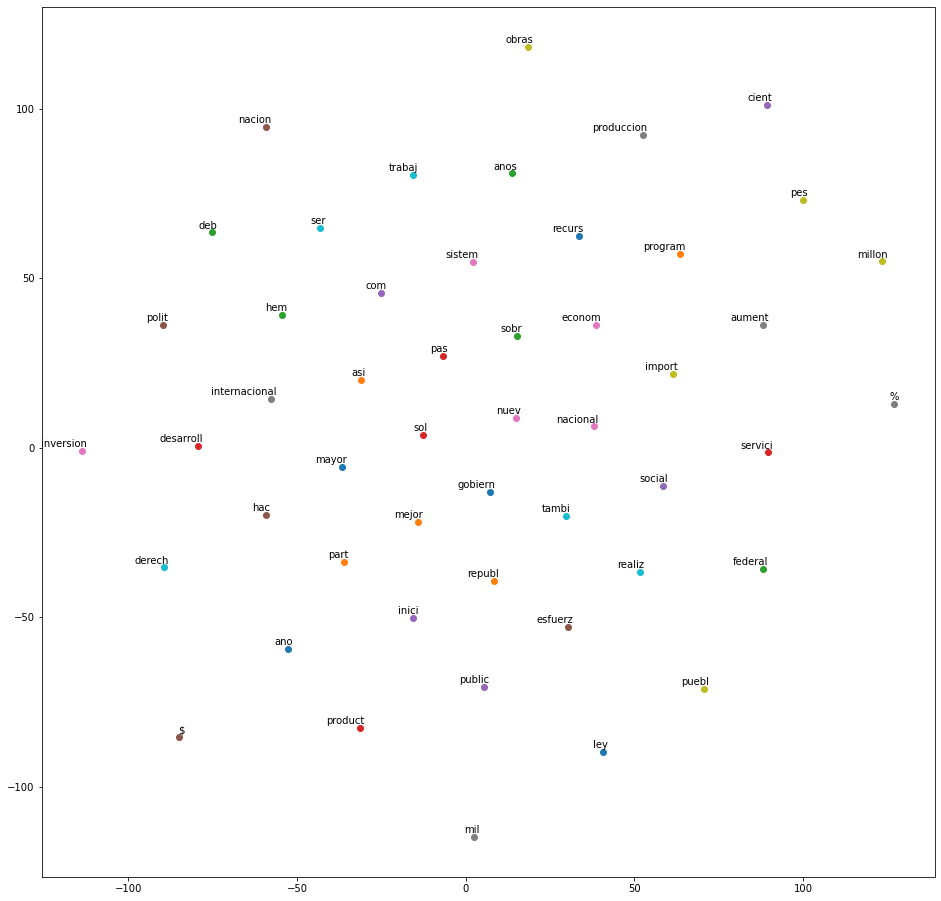

In [69]:
tsne_plot(model_2)

In [70]:
model_3 = Word2Vec(sentences=texto, size=100, window=10, min_count= 500, workers=4)

<ipython-input-67-67fdaaecd0d7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


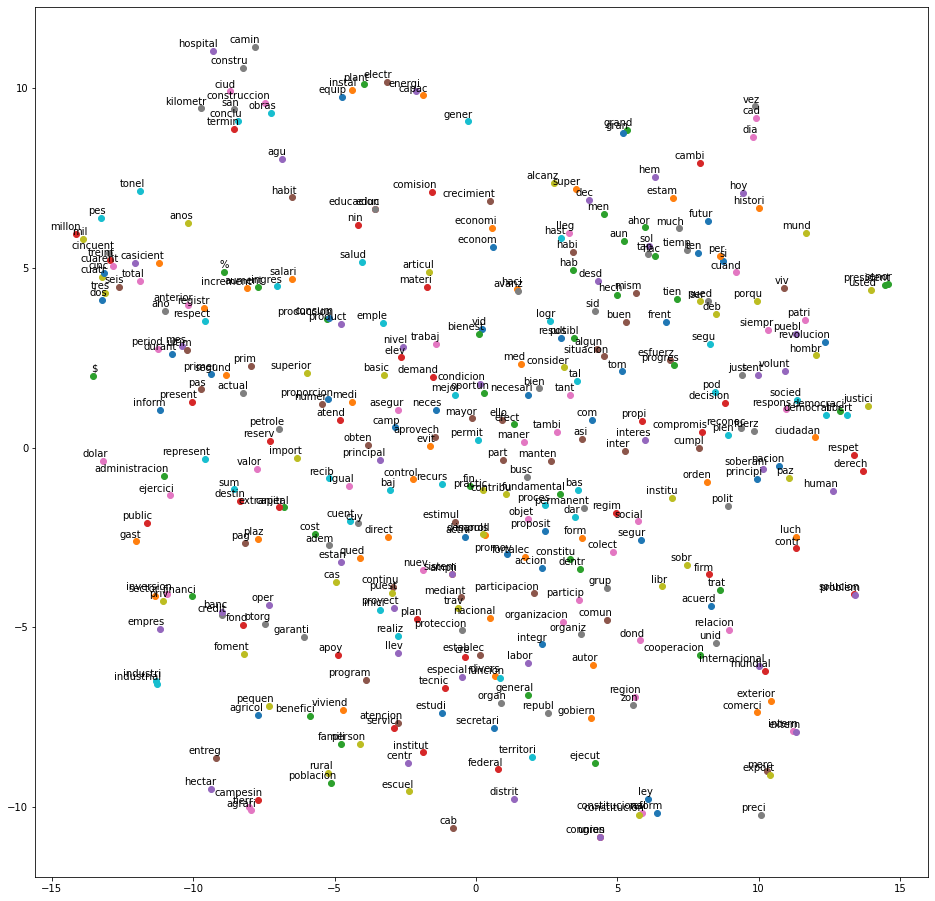

In [71]:
tsne_plot(model_3)

<ipython-input-61-67fdaaecd0d7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


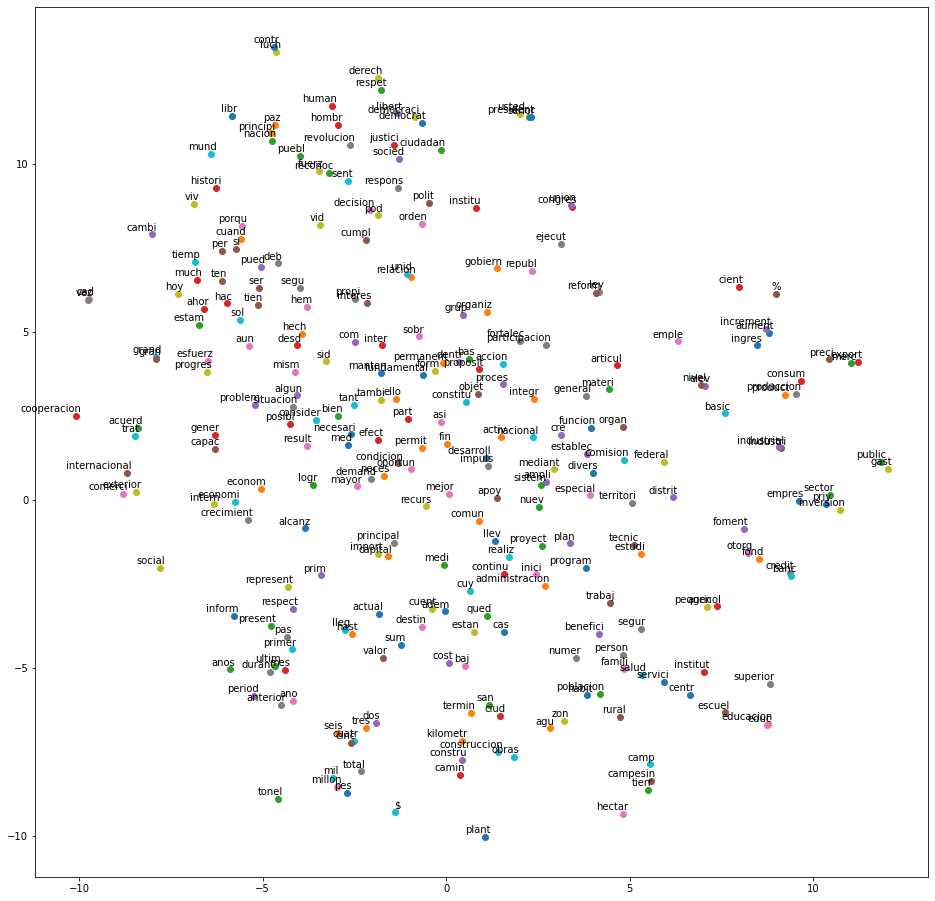

In [62]:
model_4 = Word2Vec(sentences=texto, size=100, window=10, min_count= 650, workers=4)
tsne_plot(model_4)